**Thông tin sinh viên**

MSSV: 20520275 <br />
Họ tên: Danh Võ Hồng Phúc<br />
Bài tập: bài tập 5<br />
Ngày thực hiện: 29/4/2022

In [28]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

# **Phần 1 : Ngưỡng**

In [29]:
def show2image(img_src, img_rst, title1, title2):
  plt.figure(figsize=(10,10))

  plt.subplot(1,2,1)
  plt.title(title1)
  img_src = cv.cvtcolor(img_src,cv.COLOR_BGR2RGB)
  plt.imshow(img_src,interpolation = 'bicubic')

  plt.subplot(1,2,2)
  plt.title(title2)
  img_rst = cv.cvtcolor(img_rst, cv.COLOR_BGR2RGB)
  plt.imshow(img_rst,interpolation = 'bicubic')

In [30]:
def drawHist(x):
  hist = cv.calcHist([x], [0], None, [256], [0, 256])
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.legend(('histogram'), loc = 'upper left')
  plt.show()

In [31]:
def globalThresholding(img, thres=127):
  img_rst = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img_rst[i][j] < thres:
        img_rst[i][j] = 255
      else:
        img_rst[i][j] = 0
  return img_rst

In [33]:
def adaptiveThresholding(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      cv2_imshow(x)
      drawHist(x)
  #t = np.average(x)
      t = 100
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
  return g

In [34]:
def Kmeans(img, n_clusters = 6):
  nrow, ncol, nch1 = img.shape
  g = img.reshape(nrow*ncol,nch1)
  k_means = KMeans(n_cluster = n_clusters, random_state=0).fit(g)
  t = k_means.cluster_center_[k_means_labels]
  img_res = t.reshape(nrow,ncol,nch1)
  return img_res

In [35]:
dir_monhoc = '/content/drive/MyDrive/CS231.M21.KHTN;'
dir_baitap = os.path.join(dir_monhoc,'Baitap','Baitap5')
dir_img = os.path.join(dir_baitap,'images')

**Ảnh particles**

In [ ]:
particles = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/particles.bmp'

In [ ]:
img_particles = cv.imread(particles,0)
img_particles2 = globalThresholding(img_particles)

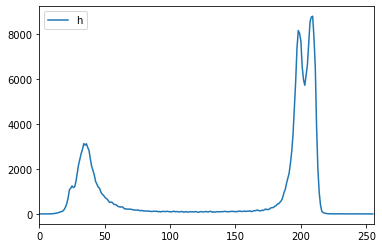

In [ ]:
drawHist(img_particles)

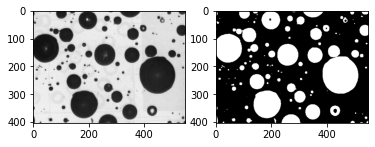

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img_particles,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_particles2,cmap='gray')

**Ảnh Phandoan01**

In [ ]:
phandoan_path = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/Phandoan01.jpg'

In [ ]:
img_phandoan = cv.imread(phandoan_path,0)
img_phandoan2 = globalThresholding(img_phandoan,150)

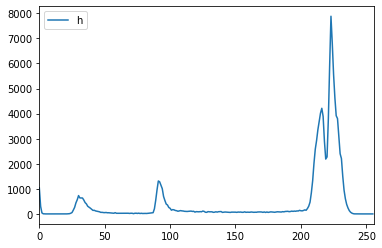

In [ ]:
drawHist(img_phandoan)

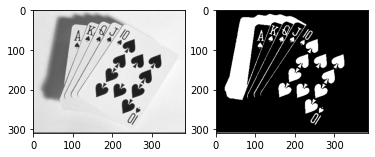

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img_phandoan,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_phandoan2,cmap='gray')

**Ảnh wdg2**

In [ ]:
wdg_path = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/wdg2.jpg'
img_wdg = cv.imread(wdg_path,0)
img_wdg2 = globalThresholding(img_wdg)

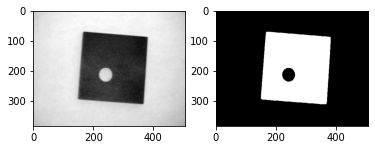

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img_wdg,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_wdg2,cmap='gray')

**Ảnh Rice**

In [ ]:
rice_path = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/rice.png'
img_rice = cv.imread(rice_path,0)
img_rice2 = globalThresholding(img_rice)

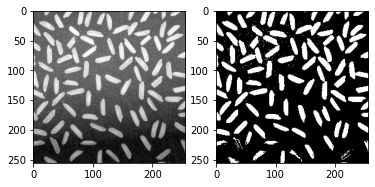

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img_rice,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(255-img_rice2,cmap='gray')

**Adaptive**

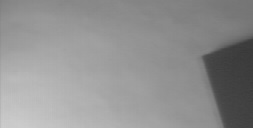

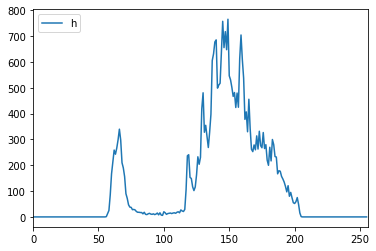

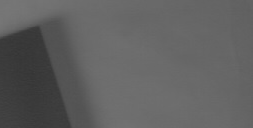

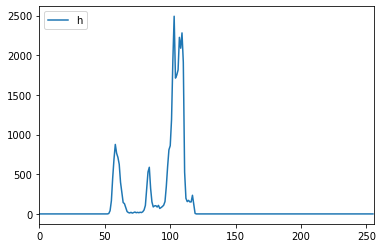

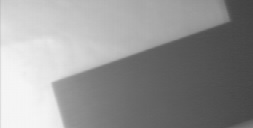

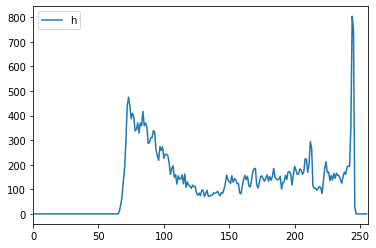

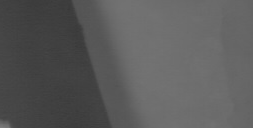

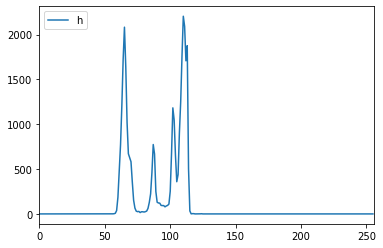

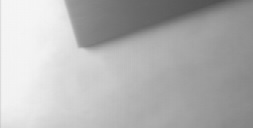

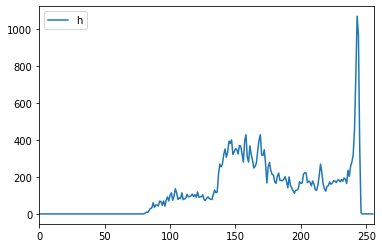

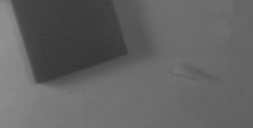

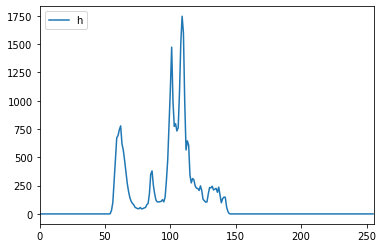

In [ ]:
wdg3 = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/wdg3.jpg'
img_wdg3 = cv.imread(wdg3,0)
img_wdg32 = adaptiveThresholding(img_wdg3,3,2)

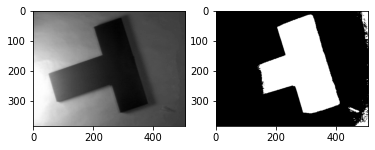

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img_wdg3,cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_wdg32,cmap='gray')

# **Phần 2: Clustering**

## **K-means**

In [ ]:
vegetable_path = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/vegetables.jpg'
img_vegetable = cv.imread(vegetable_path)

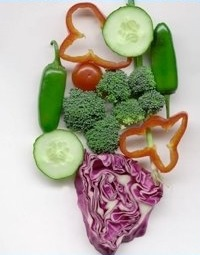

In [ ]:
path_filename = vegetable_path
img = cv.imread(path_filename)
cv2_imshow(img)
from sklearn.cluster import KMeans
def Kmeans(img, n_clusters = 7):
  nrow, ncol,nchl = img.shape
  g = img.reshape(nrow*ncol,nchl)
  k_means = KMeans(n_clusters = n_clusters,random_state = 0).fit(g)

  t = k_means.cluster_centers_[k_means.labels_]
  img_res = t.reshape(nrow, ncol, nchl)
  return img_res

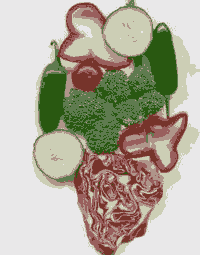

In [ ]:
cv2_imshow(Kmeans(img))

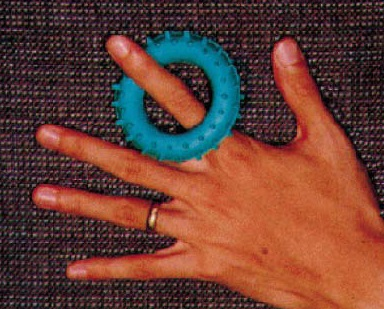

In [ ]:
path_filename = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/hand.jpg'
img = cv.imread(path_filename)
cv2_imshow(img)

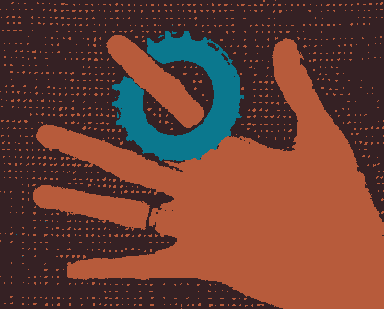

In [ ]:
cv2_imshow(Kmeans(img,3))

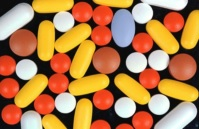

In [ ]:
path_filename = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/thuoc.jpg'
img = cv.imread(path_filename)
cv2_imshow(img)

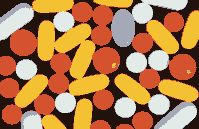

In [ ]:
cv2_imshow(Kmeans(img,5))

In [ ]:
def Kmeans2(img, n_clusters = 6):
  img_tmp = img.copy()
  nrow, ncol,nchl = img.shape
  g = []
  for y in range(nrow):
    for x in range(ncol):
      tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2], x, y]
      g.append(tmp)
  k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
  # t = k_means.cluster_centers_[k_means.labels_]
  arrcolor = np.random.rand(20,3) * 255
  t = arrcolor[k_means.labels_]
  img_res = img_tmp
  i = 0
  for y in range(nrow):
    for x in range(ncol):
      img_res[y, x] = t[i][0:3]
      i += 1
  return img_res

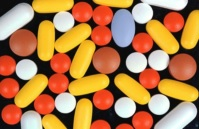

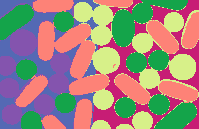

In [ ]:
img = cv.imread( '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/thuoc.jpg')
cv2_imshow(img)
cv2_imshow(Kmeans2(img,6))

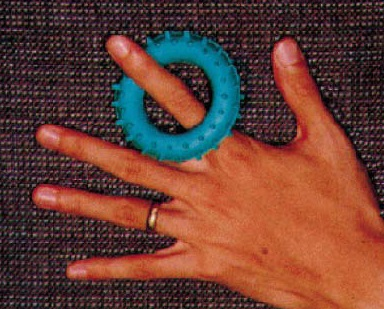

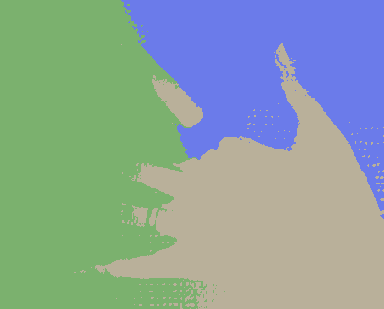

In [ ]:
img = cv.imread( '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/hand.jpg')
cv2_imshow(img)
cv2_imshow(Kmeans2(img,3))

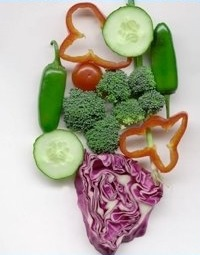

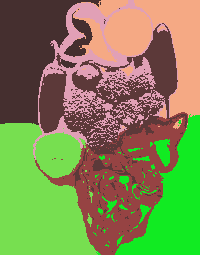

In [ ]:
img = cv.imread( '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/vegetables.jpg')
cv2_imshow(img)
cv2_imshow(Kmeans2(img,7))

## **MeanShift**

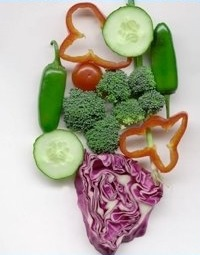

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
#from MeanShift import estimate_bandwidth

path_filename = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/vegetables.jpg'
img = cv.imread(path_filename)
cv2_imshow(img)
def Meanshift(img):
  nrow, ncol,nchl = img.shape
  g = img.reshape(nrow*ncol,nchl)
  g = np.array(g)
  band = estimate_bandwidth(g, n_samples=1000)
  ms = MeanShift(bandwidth=band, bin_seeding= True)
  ms.fit(g)
  labels = ms.labels_
  cluster_centers = ms.cluster_centers_
  tt = cluster_centers[labels]
  t = tt[:,0:3]
  img_res = t.reshape(nrow, ncol, nchl)
  img_res = img_res.astype(np.uint8)
  return img_res
  # ms = MeanShift()
  # ms.fit(g)
  # t = ms.labels_
  # img_res = t.reshape(nrow, ncol, nchl)
  #return img_res

#Meanshift(img)

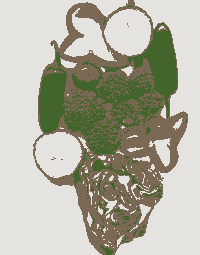

In [ ]:
cv2_imshow(Meanshift(img))

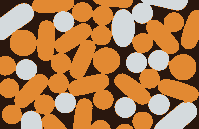

In [ ]:
img = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/thuoc.jpg'
img = cv.imread(img)
cv2_imshow(Meanshift(img))

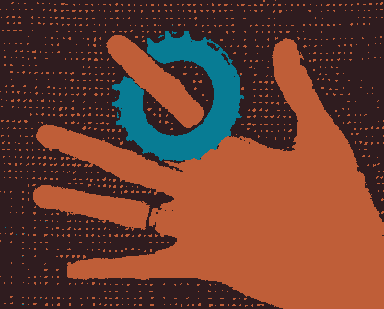

In [ ]:
img = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/hand.jpg'
img = cv.imread(img)
cv2_imshow(Meanshift(img))

## **FCM**

In [7]:
!pip install fuzzy-c-means

     |████████████████████████████████| 10.9 MB 16.9 MB/s 


In [60]:
path_filename = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/vegetables.jpg'
img = cv.imread(path_filename)

In [61]:
from fcmeans import FCM
def FCMean(img,n_clusters=7):
  nrow, ncol,nchl = img.shape
  g = img.reshape(nrow*ncol,nchl)
  g = np.array(g)
  fcm = FCM(n_clusters = n_clusters)
  fcm.fit(g)
  fcm_centers = fcm.centers
  fcm_labels = fcm.predict(g)
  tt = fcm_centers[fcm_labels]
  t = tt[:,0:3]
  img_res = t.reshape(nrow, ncol, nchl)
  img_res = img_res.astype(np.uint8)
  return img_res

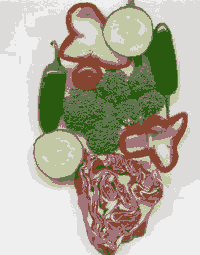

In [62]:
cv2_imshow(FCMean(img,7))

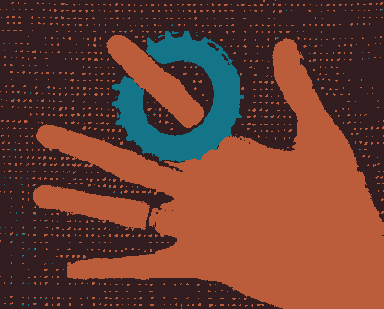

In [64]:
path_filename = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/hand.jpg'
img = cv.imread(path_filename)
cv2_imshow(FCMean(img,3))

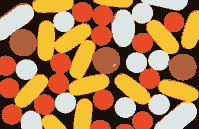

In [65]:
path_filename = '/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/thuoc.jpg'
img = cv.imread(path_filename)
cv2_imshow(FCMean(img,5))